# Logistic Regression

## Intuition

Logistic regression can be used to predict the probability of a single event based on continuous inputs. The data used to train this model is typically continuous data predicting a binary result.

### Simple Use Case

For example, we could use logistic regresion to predict the probability of marital status given income and age (years over 16). Data for this situation might look like.

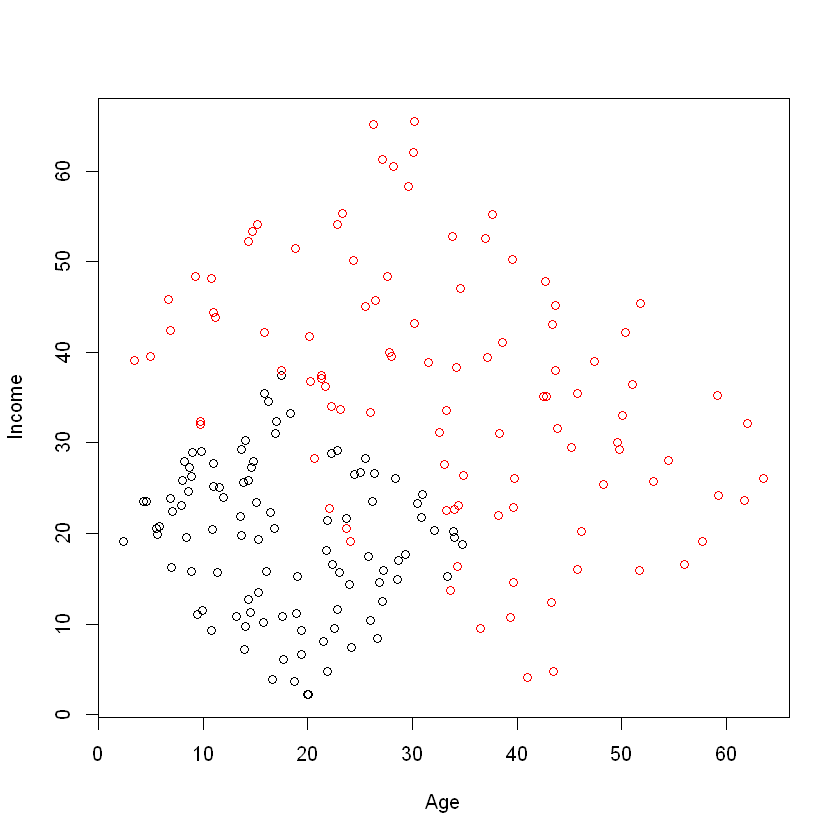

In [7]:
marriage = function(nsingle,nmarried,single_spread,married_spread){
    df <- data.frame(Age=rep(0,(nsingle+nmarried)),
                 Income=rep(0,(nsingle+nmarried)))
    # Single data
    for (i in 1:nsingle){
        l1 <- runif(1,0,1)
        l2 <- runif(1,0,single_spread)
        x1 <- l1*c(0,20) + (1-l1)*c(20,0)
        x2 <- l2*c(1/sqrt(2),1/sqrt(2))
        x <- x1 + x2
        df[i,] <- x
    }

    # Married data
    for (i in (nsingle+1):(nsingle+nmarried)){
        l1 <- runif(1,0,1)
        l2 <- runif(1,-married_spread,married_spread)
        x1 <- l1*c(15,55) + (1-l1)*c(55,15)
        x2 <- l2*c(1/sqrt(2),1/sqrt(2))
        x <- x1 + x2
        df[i,] <- x
    }

    df$Married <- as.factor(c(rep("no",nsingle),rep("yes",nmarried)))
    return(df)
}
df=marriage(100,100,25,20)
plot(Income~Age,df,col=df$Married)

Where the red points indicate those who have married and the black points indicate those who are single. Logistic regression could be used to take data like this and build a model that could predict the probability of marriage given Age and Income.

### General Linear Models 

Logistic regression is an example of a general linear model. General linear models are based upon a standard regression model with some kind of modification. To modify the standard linear regression model so that it can predict probabilities the output is feed into a "sigmoid function". The output of a standard regression model can vary between $-\infty$ and $+\infty$, feeding the output through a sigmoid function "squashes" the output to be between 0 and 1. This is demonstrated below.

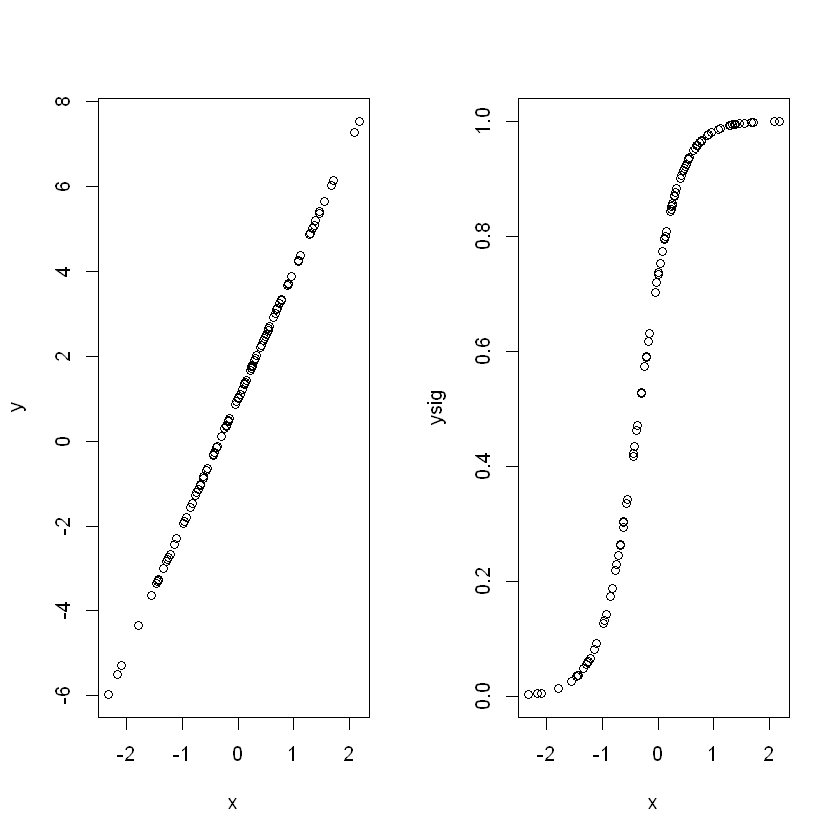

In [8]:
# Defining the sigmoid function
sigmoid = function(x) {
   1 / (1 + exp(-x))
}
# Generating the data
n <- 100
x <- rnorm(n,0,1)
y <- 3*x + 1
ysig <- sigmoid(y) 
# Plotting the data
par(mfrow=c(1,2))
plot(x,y)
plot(x,ysig)

The sigmoid function is

$$f(x) = \frac{1}{1 + e^{-x}}$$

For large negative x, $e^{-x}$ is very large so the sigmoid function is small; for x equal to 0 $e^{-x} = 1$ hence the sigmoid function is equal to 0.5; for x large and positive $e^{-x}$ is very small hence the sigmoid function is close to 1. The inverse function can be found, by rearranging to make x the subject. Firstly, multiply top and bottom by $e^{x}$.

$$p(x) = \frac{e^{x}}{e^{x} + 1}$$

$$\implies (e^{x} + 1)p(x) = e^{x} \implies p(x)e^{x} + p(x) = e^{x} \implies p(x) e^{x} - e^{x} = -p(x)$$

$$\implies e^{x} (p(x) - 1)= -p(x) \implies e^{x}=\frac{p(x)}{1-p(x)} \implies x=\ln{\frac{p(x)}{1-p(x)}}$$

$$\implies p^{-1}(x)=\ln{\frac{x}{1-x}}$$

The inverse of the sigmoid function is sometimes called the logit function. To relate the above function to the logistic regression model, think of x as the output of a linear model and p(x) as a probability. So, x can be throught of as.

$$x=\beta_{0} + \beta_{1}x_{1} + + \beta_{2}x_{2} + .... + \beta_{n} x_{n}$$

# A Basic Example

## Training a Logistic Regression Model

The code below trains a logistic model using the Age, Income and Mariage data frame created above

In [19]:
# Modifying the above data frame so married is one and single is zero
df$MarriedBin <- as.integer(df$Married=="yes")
fit_initial <- glm(MarriedBin ~ Age+Income,family=binomial,data=df)

The code below produces a summary of the fit and a few predictions as a sanity check

In [20]:
summary(fit_initial)
df_new <- data.frame(Age=c(20,30,60,10,40),Income=c(20,30,60,40,10))
predictions <- predict(fit_initial,newdata=df_new,type='response')
print("data:")
df_new
print("predictions:")
predictions


Call:
glm(formula = MarriedBin ~ Age + Income, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4989  -0.9007  -0.1073   0.8462   1.8888  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.100778   1.205606  -1.743   0.0814 .
Age          0.001173   0.035928   0.033   0.9739  
Income       0.070790   0.037899   1.868   0.0618 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 21.744  on 17  degrees of freedom
AIC: 27.744

Number of Fisher Scoring iterations: 4


[1] "data:"


Age,Income
20,20
30,30
60,60
10,40
40,10


[1] "predictions:"


1         2         3         4         5 
0.3404007 0.5145272 0.9017683 0.6775558 0.2065340

The summary is similar to that of the linear regression summary, there are regression coefficients with related p-values. With reference to the plot above the probability outputs look reasonable. The standard way to predict an outcome is to threshold with a value of 0.5. So, for person 1 in the data above, the probability of marriage is less than 0.5, so we would predict single, for person 2 the probability of marriage is greater than 0.5 so we would predict married. It is also possible to generate a decision boundary; given that we threshold with a value of 0.5, and with reference to sigmoid function notes above, we know that we need x (or the linear model output) to be 0 for a probility of 0.5. So the equation of the decision boundary in the general case is.

$$0 = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + .... + \beta_{n} x_{n}$$

For our model we have $x_{1}$ as Age and $x_{2}$ as Income. Using the above equation and making Income the subject gives.

$$Income = -\frac{\beta_{0}}{\beta_{2}} -\frac{\beta_{1}}{\beta_{2}} Age$$

The code below uses the equation above to include a decision boundary into the plot above

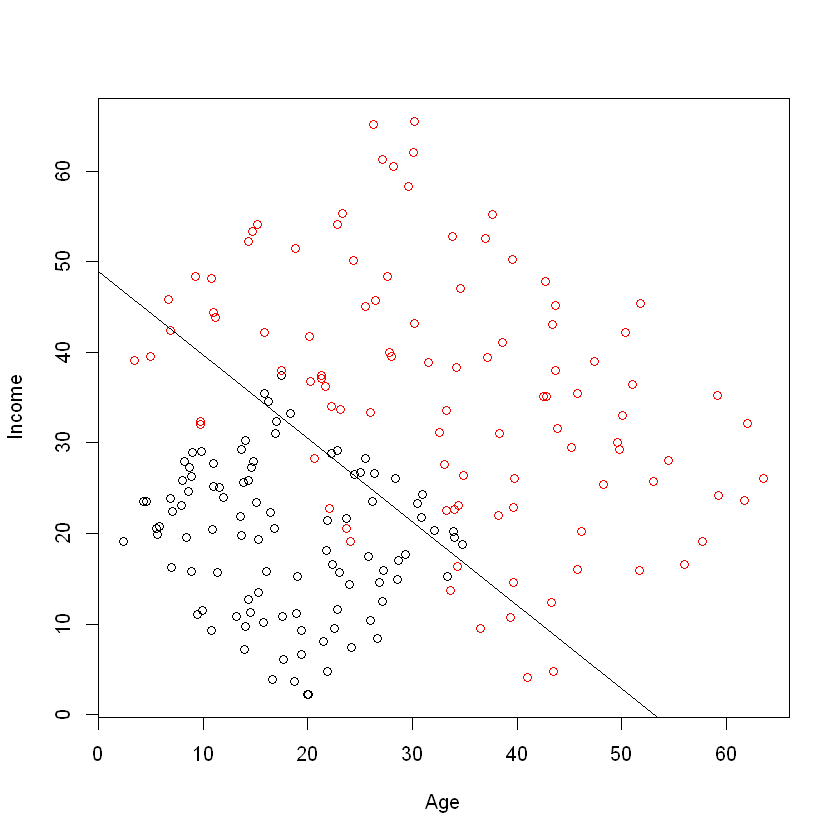

In [11]:
intersect <- -fit_initial$coeff[1]/fit_initial$coeff[3]
gradient <- -fit_initial$coeff[2]/fit_initial$coeff[3]
# plots
plot(Income~Age,df,col=df$Married)
abline(intersect,gradient)

## Model Diagnostics

### Confusion Matrix/Truth Table

A confusion matrix is a way of assessing the models prediction against the actual results. The code below produces a confusion matrix for the marriage status example above.

In [13]:
#install.packages("caret",repos="http://cran.us.r-project.org")
#install.packages("e1071",repos="http://cran.us.r-project.org")
library(caret)
library(e1071)
df$probs <- predict(fit_initial,type="response")
MarriedBinPred <- ifelse(df$probs>0.5,1,0)
mat <- confusionMatrix(as.factor(MarriedBinPred), as.factor(df$MarriedBin))
mat$table

          Reference
Prediction  0  1
         0 82 15
         1 18 85

The reference is the actual data and the prediction what the model has produced. Going around the table from top left to bottom right
* Top left people who were correctly predicted to be single (True Negatives (TN))
* Top right people who were incorrectly predicted to be single (False Negatives (FN))
* Bottom left people who were incorrectly predicted to be married (False Positives (FP))
* Bottom right people who were correctly predicted to be married (True Positives (TP))

__Remember the positive or negative part of the name coincides with the prediction, the true or false part of the name coincides with the whether the prediction was correct or not.__ The following definitions also need to be learnt for the EMC.

* Accuracy = (TN + TP)/(TN + TP + FN + FP)
* TPR = sensitivity = true positive rate = percentage of positives the classifier correctly identified = TP/(Actual Positives) = TP/(TP + FN)
* FPR = specificity = false positive rate = percentage of negatives the classifier marked as positive = FP/(Actual Negative) = FP/(TN + FP)
* Precision = Percentage of those predicted positive that are really positive = TP/(TP + FP)
* Recall = Percentage of positive instances that were correctly labelled = TP/(TP + FN) = TPR

### ROC Curves and the AUC Parameter

ROC (Receiver Operating Characteristic) curves are a way of assessing the "performance" of the model. I have reproduced the marriage data with fewer data points below.

In [25]:
# generating simple data
single_spread = 20
married_spread = 25
nsingle = 10
nmarried = 10
df=marriage(nsingle,nmarried,single_spread,married_spread)

As before a logistic regression model has been fit and the probabilities calculated.

Age,Income,Married,MarriedBin,probs
20.557448,25.698150,no,0,0.75810085
5.118870,24.359784,no,0,0.06222977
11.140977,20.700821,no,0,0.10062149
8.141332,24.490223,no,0,0.12037797
24.239333,16.074894,no,0,0.43240688
30.748610,12.018865,no,0,0.56680530
29.703733,12.161868,no,0,0.51568297
19.119326,21.346511,no,0,0.44795086
6.853559,22.059480,no,0,0.05443632
12.350472,25.147815,no,0,0.29543273


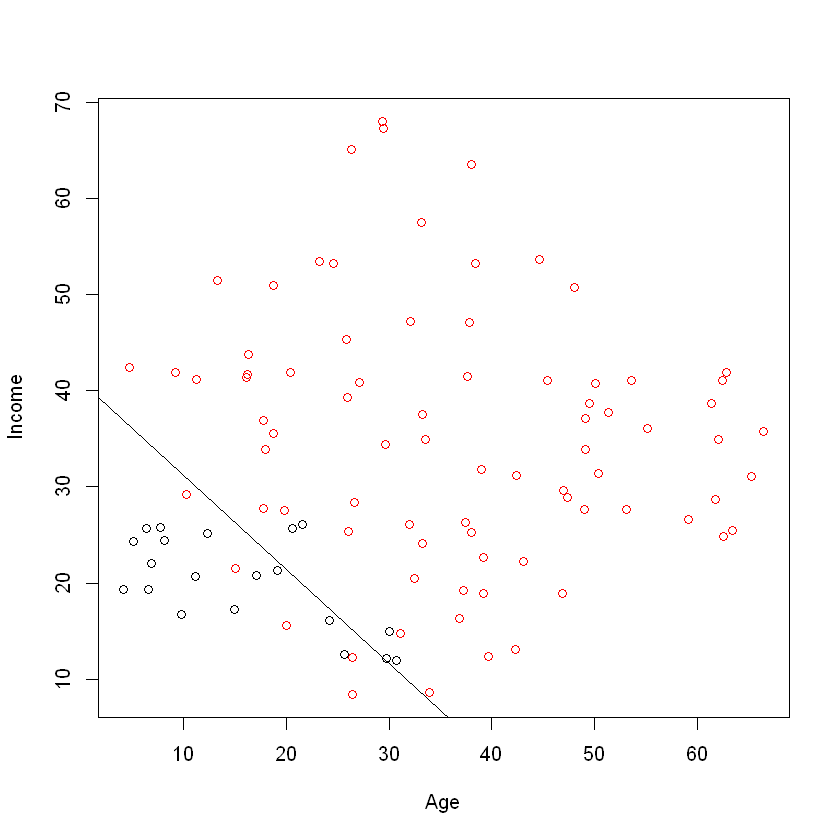

In [26]:
# Modifying the above data frame so married is one and single is zero
df$MarriedBin <- as.integer(df$Married=="yes")
# Fitting the model
fit <- glm(MarriedBin ~ Age+Income,family=binomial,data=df)
# producing training set predictions
df$probs <- predict(fit,type="response")
intersect <- -fit$coeff[1]/fit$coeff[3]
gradient <- -fit$coeff[2]/fit$coeff[3]
# plots
plot(Income~Age,df,col=df$Married)
abline(intersect,gradient)
df

As explained previously, a threshold of 0.5 is used to determine the prediction. However, it is clearly preferable to predict 1 for a probability value of 0.99 that for a probability value of 0.51, ideally we would like to have the probability values as closely clustered to 0 or 1 as possible. An ROC curve helps us assess the extent of the clustering. Theoretically, if all of the probabilities were 0 or 1 correctly an ROC curve would look like:

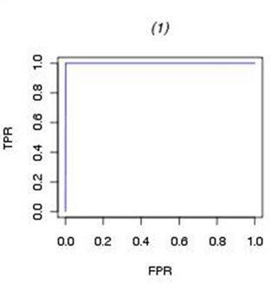

The worst possible case looks like:

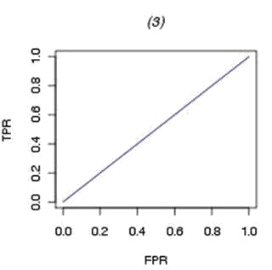

The ROC curve for our model is plotted below

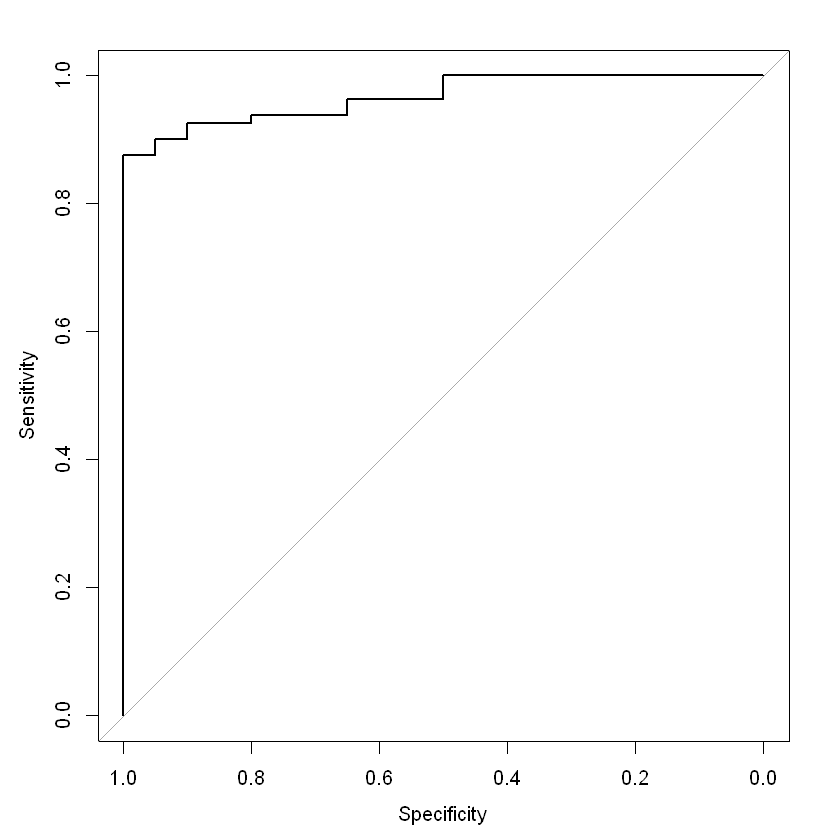

In [27]:
# install.packages("pROC",repos="http://cran.us.r-project.org")
library(pROC)
roc <- roc(MarriedBin ~ probs, data = df)
plot(roc)

The area under this curve (auc) is another diagnostic parameter, clearly a "perfect" model would give 1 and as the model gets worse the auc will get closer to 0.5

In [28]:
auc <- auc(MarriedBin ~ probs, data = df)
auc

Area under the curve: 0.9662

__To see the effect of changing the fitting the model to data that is not so neatly split, experiment with the spread parameters in the cell at the start of this section__

### Interpretation of Coefficients

Recall the formulation of Logistic Regression derived in the General Linear Models section

$$ p(x) = \frac{e^{x}}{1 + e^{x}} $$

where

$$x=\beta_{0} + \beta_{1}x_{1} + + \beta_{2}x_{2} + .... + \beta_{n} x_{n}$$

Following the general manipulation in that section, we could equivalently write

$$ \ln{\frac{p(x)}{1-p(x)}} = \beta_{0} + \beta_{1}x_{1} + + \beta_{2}x_{2} + .... + \beta_{n} x_{n} $$

$$ \implies \frac{p(x)}{1-p(x)} = e^{\beta_{0} + \beta_{1}x_{1} + + \beta_{2}x_{2} + .... + \beta_{n} x_{n}} $$

$$ \implies \frac{p(x)}{1-p(x)} = e^{\beta_{0}} \times e^{\beta_{1}x_{1}} \times ... \times e^{\beta_{n} x_{n}} $$

The quantity of the left is "the odds" of event x happening. So, if $p(x) = \frac{2}{3}$, then $1-p(x)=\frac{1}{3}$, then the odds of x is $\frac{2}{3} \div \frac{1}{3}=2$. This can be interpretted as, on average, x occurs 2 times for every 1 times it doesn't. If we increase $x_{i}$ by 1, then the right hand side of the equation becomes

$$e^{\beta_{0}} \times e^{\beta_{1}x_{1}} \times ... \times e^{\beta_{i} (x_{i} + 1)} \times... \times e^{\beta_{n} x_{n}}$$

$$=e^{\beta_{0}} \times e^{\beta_{1}x_{1}} \times ... \times e^{\beta_{i}x_{i}}e^{\beta_{i}} \times... \times e^{\beta_{n} x_{n}}$$

In this last expression, note that the terms are exactly as they would have been prior to the increase apart from the inclusion of the term $e^{\beta_{i}}$. Hence we can interpret the logistic regression coefficient by saying an increase of 1 in $x_{i}$ changes the odds by a factor of $e^{\beta_{i}}$. The code below interprets calculates these exponentials for the marriage model 

In [29]:
exp(fit_initial$coeff[2])
exp(fit_initial$coeff[3])

Age 
1.001174

Income 
1.073356

The Age and Income odd would change by these factors for a unit increase in age and a unit increase in income

### Conservation of proportions

A property of logistic regression is that it conserves proportion, in the sense that the sum of the probabilities should equal the number of positives. The code below verifies this for our marriage data.

In [30]:
sum(df$probs)

[1] 80

# Lab

## Mandatory

* Experiment with the spread parameters and make sure your understand the effect you are having on the probabilities and the ROC curve, see the "ROC Curves and the AUC Parameter" section.
* Experiment with the number of married and single people and understand how this relates to the sum of the model probabilities, see the "ROC Curves and the AUC Parameter" section.
   
* 
* Go through each of the EMC questions (below) and make sure you can relate them to the theory above

## Extension



## EMC Questions and Answers

### QUESTION NO: 16 (Area 4)
Which type of numeric value does a logistic regression model estimate?

* A. Probability
* B. A p-value
* C. Any integer
* D. Any real number

Answer: A

### Reason

"A" is clearly the answer refer to the general linear model section of these notes for reasons. A "p-values" is a probability, but a probability associated with significance tests, 

### QUESTION NO: 49 (Area 4)

You are building a logistic regression model to predict whether a tax filer will be audited within the next two years. Your training set population is 1000 filers. The audit rate in your training data is 4.2%. What is the sum of the probabilities that the model assigns to all the filers in your training set that have been audited?

* A. 42.0
* B. 4.2
* C. 0.42
* D. 0.042

Answer: A

### Reason

42/1000 = 4.2/100 = 4.2%. Logistic regression conserves proportions, see the diagnostics section above

### QUESTION NO: 78 (Area 4)

Which data type value is used for the observed response variable in a logistic regression model?

* A. Any positive real number
* B. Any integer
* C. A binary value
* D. Any real number

Answer: C

### Reason

Logistic regression output a probability, thresholding with a value of 0.5 gives a prediction of 0 or 1

### QUESTION NO: 99 (Area 4)

What describes a true property of Logistic Regression method?

* A. It is robust with redundant variables and correlated variables.
* B. It handles missing values well.
* C. It works well with discrete variables that have many distinct values.
* D. It works well with variables that affect the outcome in a discontinuous way.

Answer: A

### Reason

C is wrong as logistic regression would create a unique feature for every distinct value, D is wrong as there is a continuous link between the features and the outcome, a decision tree would be better for discontinuous data (see the decision tree notebook) and B is a property you would associate with Niave Bayes (see Niave Bayes notebook). Including redundant and correlated variables is not desirable and may inflate model variance, but logistic regression can still be attempted.

### QUESTION NO: 108 (Area 4)

What describes a true limitation of Logistic Regression method?

* A. It does not handle missing values well.
* B. It does not handle redundant variables well.
* C. It does not handle correlated variables well.
* D. It does not have explanatory values

Answer: A

### Reason

A is property of Naive Bayes. B & C are not the answer as logistic regression can handle redundant and correlated variables & D just doesn't make any sense

### QUESTION NO: 14 (Area 4)

What is an appropriate data visualization to use in a presentation for an analyst audience?

* A. Pie chart
* B. Area chart
* C. Stacked bar chart
* D. ROC curve

Answer: D

### Reason

A,B and C are all standard reporting charts, the idea is an analyst would be interested in a chart that provides information regarding model diagnostics, therefore D makes the most sense

### QUESTION NO: 159 (Area 4)
Refer to the exhibit.

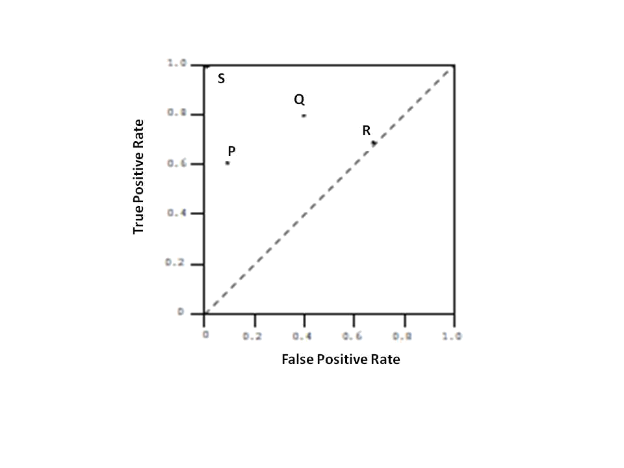

The graph represents an ROC space with four classifiers labelled A through D. Which point in the graph represents a perfect classification?

* A. S
* B. P
* C. Q
* D. R

Answer: A

### Reason

Go the the model diagnoistics section above



### QUESTION NO: 162 (Area 4)
Which ROC curve represents a perfect model fit?

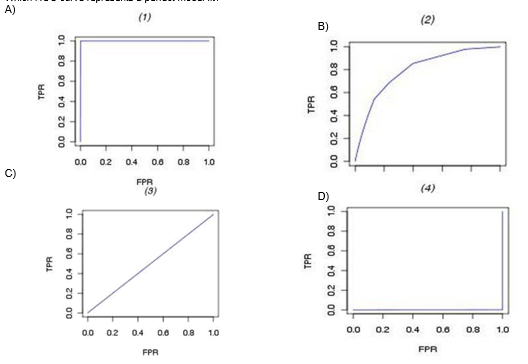

Answer: A

### Reason

Go through the model diagnoistics section above

### QUESTION NO: 163 (Area 4)
Refer to the exhibit.

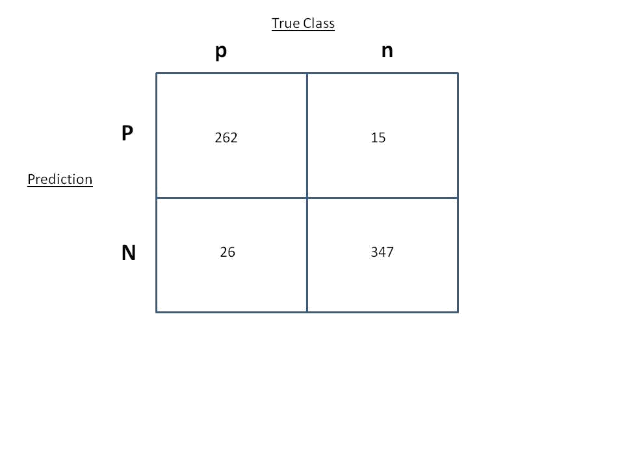

You have scored your Naive bayesian classifier model on a hold out test data for cross validation and determined the way the samples scored and tabulated them as shown in the exhibit. What are the the False Positive Rate (FPR) and the False Negative Rate (FNR) of the model?

* A. FPR = 15/262, FNR = 26/288
* B. FPR = 26/288, FNR = 15/262
* C. FPR = 262/15, FNR = 288/26
* D. FPR = 288/26, FNR = 262/15

Answer: A

### Reason

A isn't actually quite correct they have made a mistake, can you see why? However, it is the most correct 



### QUESTION NO: 161 (Area 4)
Refer to the exhibit.

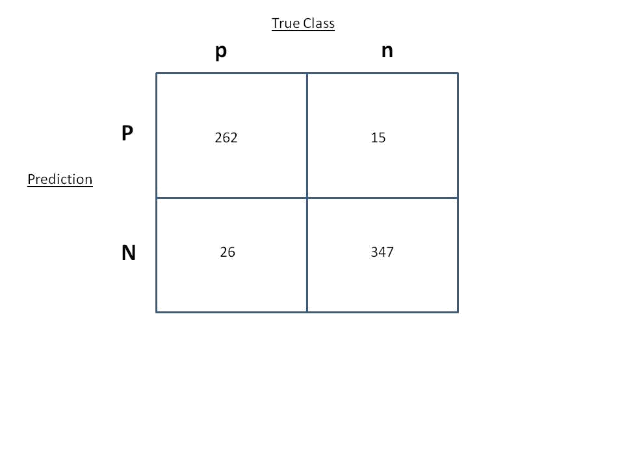

You have scored your Naive bayesian classifier model on a hold out test data for cross validation and determined the way the samples scored and 
tabluated them as shown in the exhibit. What are the Precision and Recall rate of the model?

* A. Precision = 262/277, Recall = 262/288
* B. Precision =262/288, Recall = 262/277
* C. Precision = 277/262, Recall = 288/262
* D. Precision = 288/262, Recall = 277/262

Answer: A

### Reason

Refer to model diagnostics section above
